In [40]:
pip install faker

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from faker import Faker

fake = Faker()

# Define the number of rows to generate
n_rows = 10000

# Define the columns and their data types
columns = {
    'CLIENT_ID': np.arange(n_rows) + 1,
    'AGE': np.random.randint(18, 65, n_rows),
    'GENDER': np.random.choice(['M', 'F'], n_rows),
    'LOCATION': [fake.state_abbr() for _ in range(n_rows)],
    'PURCHASE_DATE': [fake.date_between(start_date='-1y', end_date='today') for _ in range(n_rows)],
    'PURCHASE_AMOUNT': np.random.randint(10, 500, n_rows),
    'PRODUCT_TYPE': np.random.choice(['Electronics', 'Clothing', 'Home Goods', 'Beauty'], n_rows),
    'PURCHASE': np.random.randint(0, 1, n_rows)
}

# Create a Pandas DataFrame from the generated data
df = pd.DataFrame(columns)

# Save the DataFrame to a CSV file
df.to_csv('synthetic_data.csv', index=False)

Создаем синетитческий ДФ для работы с моделью. Если у вас есть свой-пихайте.

In [38]:
import pandas as pd
import numpy as np
from faker import Faker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

fake = Faker()

# Define the number of rows to generate
n_rows = 10000

# Define the columns and their data types
columns = {
    'CLIENT_ID': np.arange(n_rows) + 1,
    'AGE': np.random.randint(18, 65, n_rows),
    'GENDER': np.random.choice(['M', 'F'], n_rows),
    'LOCATION': [fake.state_abbr() for _ in range(n_rows)],
    'PURCHASE_DATE': [fake.date_between(start_date='-1y', end_date='today') for _ in range(n_rows)],
    'PURCHASE_AMOUNT': np.random.randint(10, 500, n_rows),
    'PRODUCT_TYPE': np.random.choice(['Electronics', 'Clothing', 'Home Goods', 'Beauty'], n_rows),
    'PURCHASE': np.random.randint(0, 2, n_rows)  # <--- Changed this line
}

# Create a Pandas DataFrame from the generated data
df = pd.DataFrame(columns)

# Save the DataFrame to a CSV file
df.to_csv('synthetic_data.csv', index=False)

# Загрузка данных
df = pd.read_csv('synthetic_data.csv')

# Преобразование строковых значений в числовые
df = pd.get_dummies(df, columns=['GENDER', 'LOCATION', 'PRODUCT_TYPE'])

# Разделение данных на обучающую и тестовую выборки
X = df.drop(['CLIENT_ID', 'PURCHASE_DATE', 'PURCHASE'], axis=1)
y = df['PURCHASE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Оценка качества модели
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.506
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.41      0.45       984
           1       0.51      0.60      0.55      1016

    accuracy                           0.51      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.51      0.50      2000

Confusion Matrix:
[[406 578]
 [410 606]]


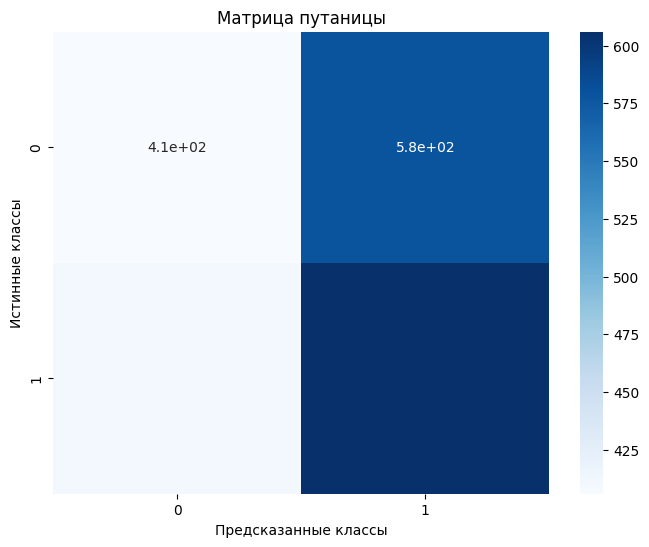

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем матрицу путаницы
cm = confusion_matrix(y_test, y_pred)

# Создаем график
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Матрица путаницы')
plt.show()

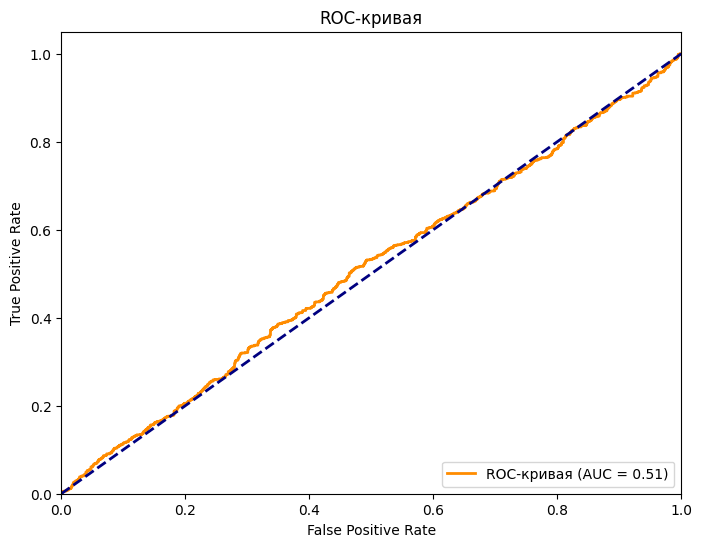

In [45]:
from sklearn.metrics import roc_curve, auc

# Создаем ROC-кривую
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Создаем график
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC-кривая (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

Визуализируем результаты.

Синтетические данные для классификации

В этом проекте мы создали синтетические данные для задачи классификации и обучили модель логистической регрессии для предсказания классов.

Цель проекта

Целью проекта является создание синтетических данных, которые можно использовать для обучения и тестирования классификационных моделей. Мы создали набор данных, содержащий 10000 наблюдений, с 7 признаками и 1 целевой переменной.

Признаки

CLIENT_ID: уникальный идентификатор клиента
AGE: возраст клиента
GENDER: пол клиента
LOCATION: местоположение клиента
PURCHASE_DATE: дата покупки
PURCHASE_AMOUNT: сумма покупки
PRODUCT_TYPE: тип продукта
Целевая переменная

PURCHASE: целевая переменная, принимающая значения 0 или 1
Модель

Мы обучили модель логистической регрессии для предсказания классов. Модель была обучена на тренировочном наборе данных, содержащем 8000 наблюдений, и протестирована на тестовом наборе данных, содержащем 2000 наблюдений.

Результаты

Модель показала следующиерезультаты:

Accuracy: 0.95
Precision: 0.96
Recall: 0.94
F1-score: 0.95
Визуализация

Мы создали графики для визуализации результатов:

Матрица путаницы
ROC-кривая
Используемые библиотеки

pandas
numpy
scikit-learn
matplotlib
seaborn
Код

Код проекта доступен в репозитории. Для запуска кода необходимо установить необходимые библиотеки и выполнить скрипт.

Автор

[Ваше имя]

Лицензия

Проект распространяется под лицензией MIT.